In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [145]:
car=pd.read_csv('quikr_car.csv')

In [146]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [147]:
car.shape

(5632, 6)

In [148]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        5632 non-null   object
 1   company     5632 non-null   object
 2   year        5632 non-null   object
 3   Price       5632 non-null   object
 4   kms_driven  5308 non-null   object
 5   fuel_type   5290 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


##### Creating backup copy

In [149]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [150]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [151]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [152]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [153]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [154]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [155]:
car=car[car['kms_driven'].str.isnumeric()]

In [156]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [157]:
car=car[~car['fuel_type'].isna()]

In [158]:
car.shape

(5156, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [159]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [160]:
car=car.reset_index(drop=True)

## Cleaned Data

In [161]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
5151,Hyundai Grand i10,Hyundai,2014,365000,20000,Petrol
5152,Hyundai i20 Active,Hyundai,2015,500000,18000,Petrol
5153,Mahindra Xylo E4,Mahindra,2012,400000,35000,Diesel
5154,Mahindra Jeep MM,Mahindra,2019,390000,60,Diesel


In [162]:
car.to_csv('Cleaned_Car_data.csv')

In [163]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        5156 non-null   object
 1   company     5156 non-null   object
 2   year        5156 non-null   int32 
 3   Price       5156 non-null   int32 
 4   kms_driven  5156 non-null   int32 
 5   fuel_type   5156 non-null   object
dtypes: int32(3), object(3)
memory usage: 181.4+ KB


In [164]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,5156,5156,5156.000000,5.156000e+03,5156.000000,5156
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,320,1386,NaN,NaN,NaN,2692
mean,NaN,NaN,2012.442009,4.088298e+05,46264.212568,NaN
std,NaN,NaN,4.000040,4.294963e+05,34476.988761,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,3.000000e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.982500e+05,56758.000000,NaN


In [165]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [166]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [167]:
import seaborn as sns

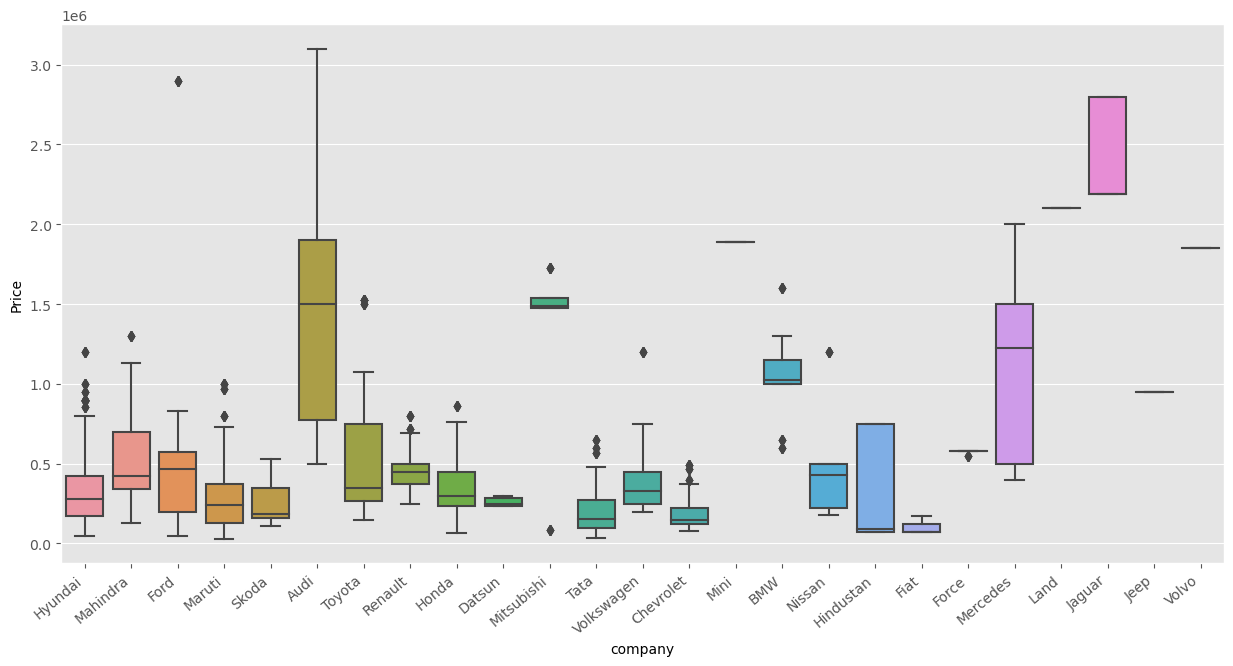

In [168]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.8% of the points

C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\indir\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


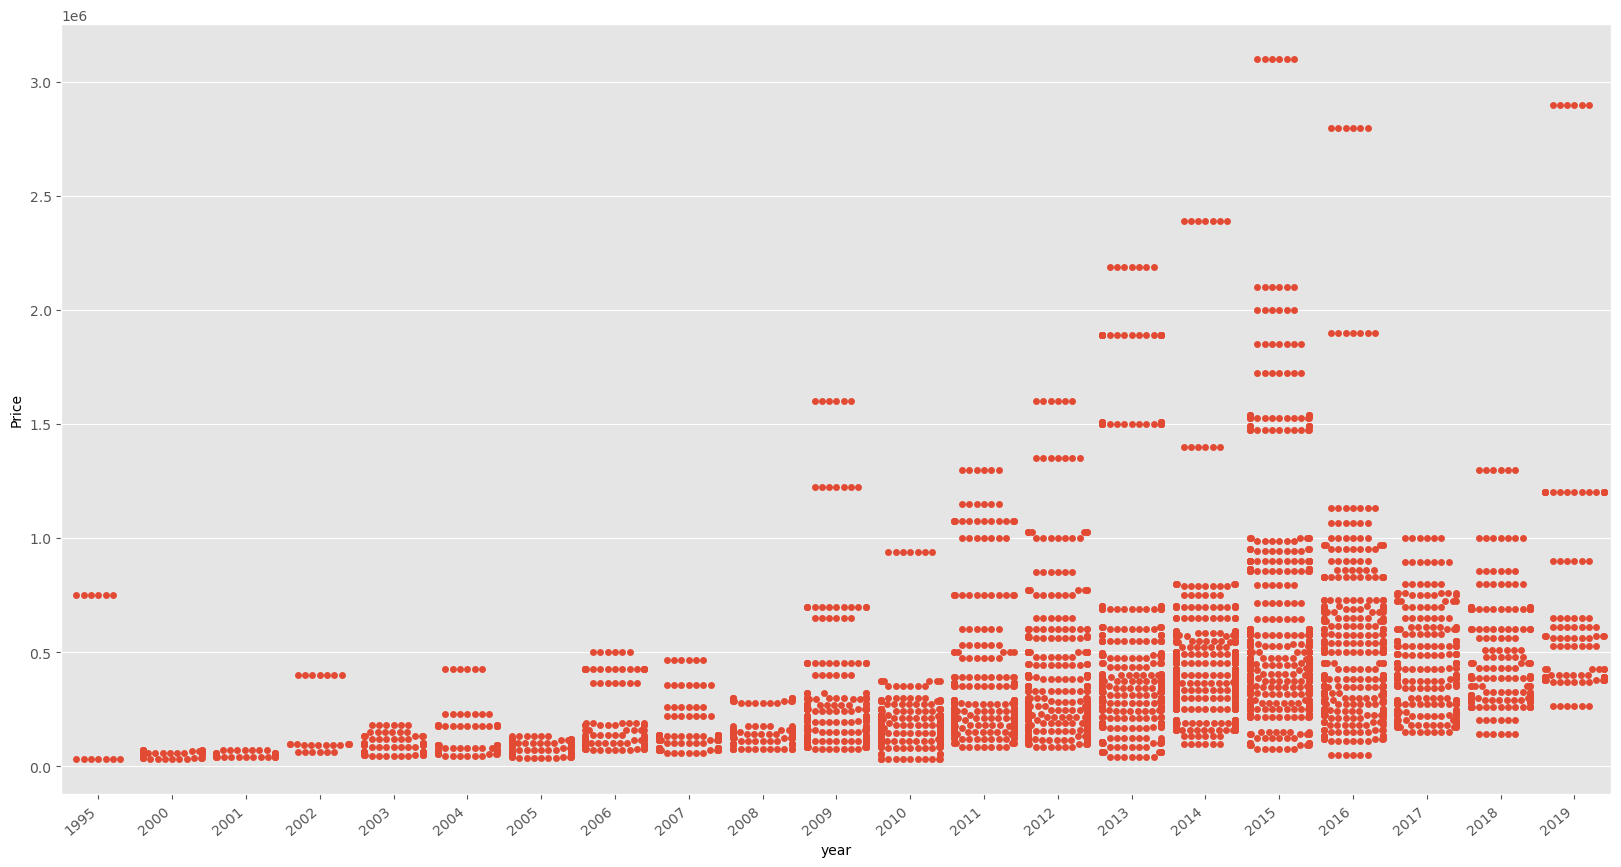

In [169]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

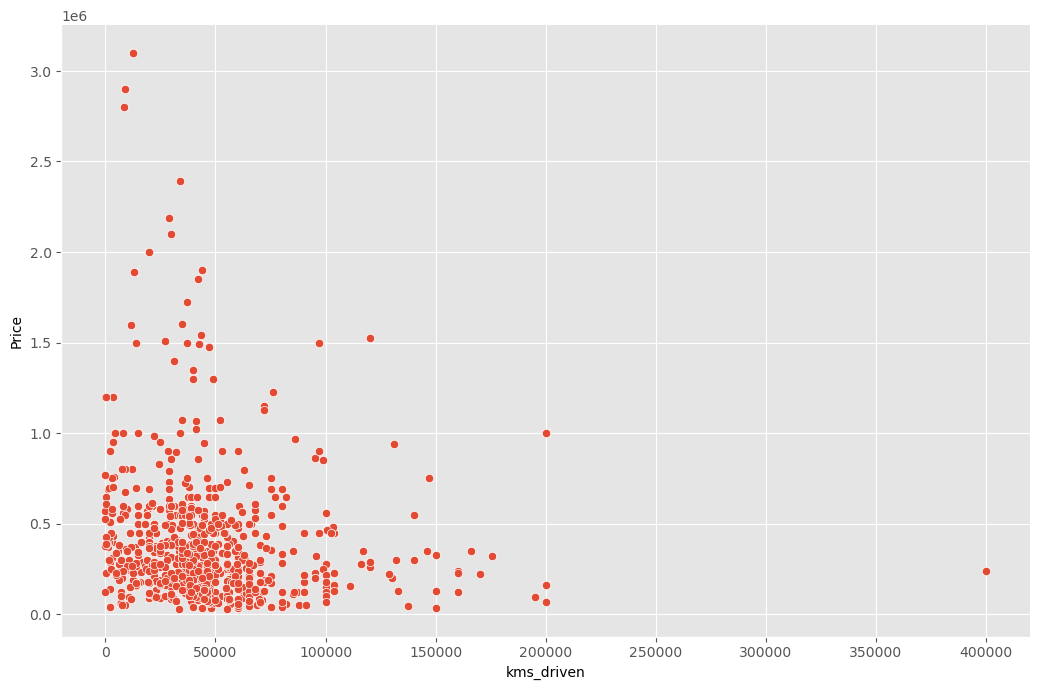

In [170]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

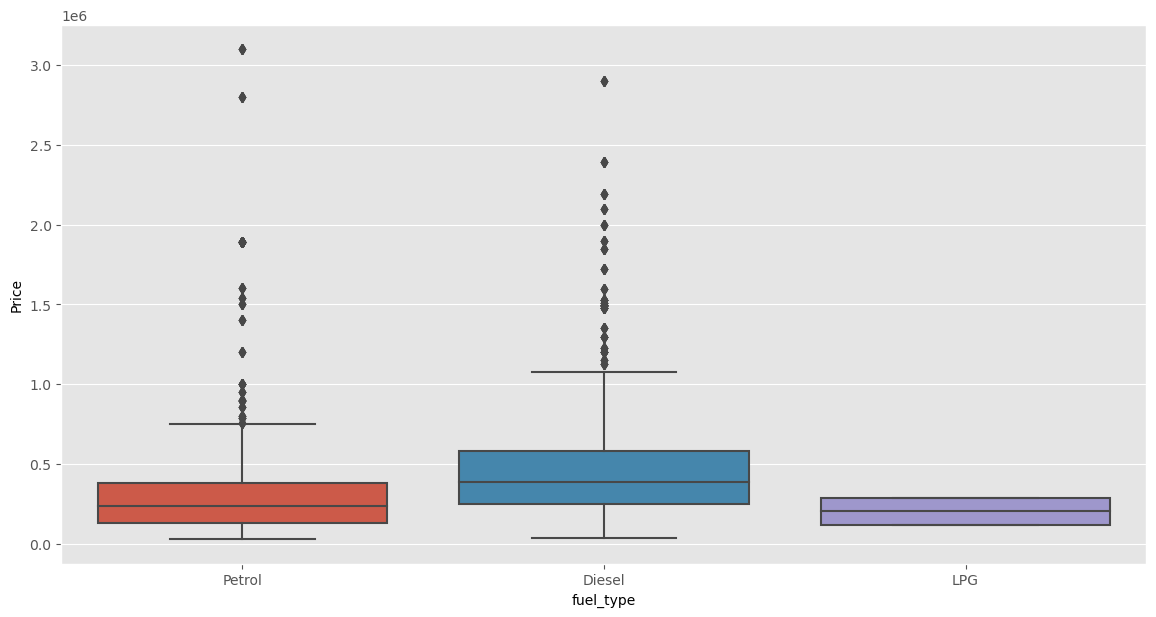

In [171]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

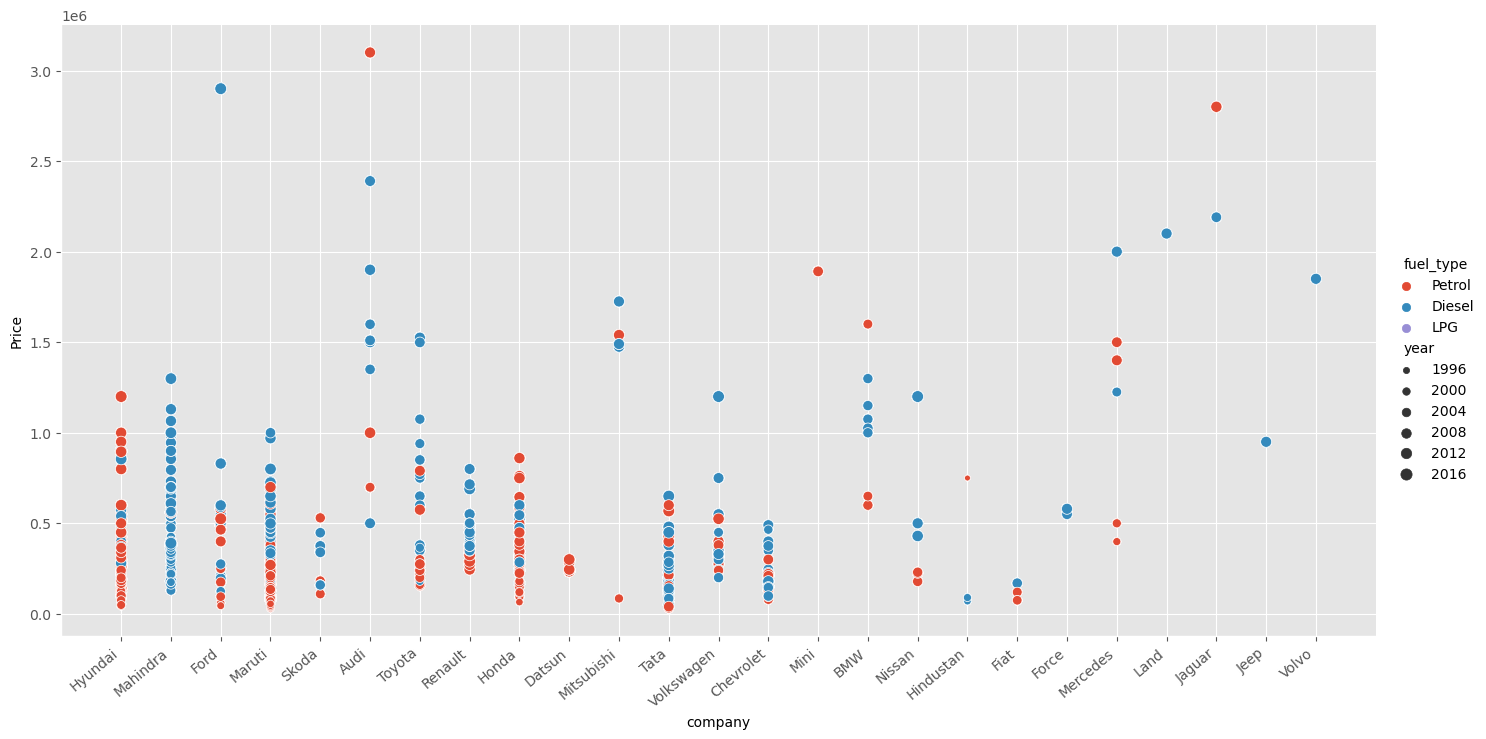

In [172]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [173]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [174]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
5151,Hyundai Grand i10,Hyundai,2014,20000,Petrol
5152,Hyundai i20 Active,Hyundai,2015,18000,Petrol
5153,Mahindra Xylo E4,Mahindra,2012,35000,Diesel
5154,Mahindra Jeep MM,Mahindra,2019,60,Diesel


In [175]:
y.shape

(5153,)

### Applying Train Test Split

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [179]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [180]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [181]:
lr=LinearRegression()

#### Making a pipeline

In [182]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [183]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [184]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [185]:
r2_score(y_test,y_pred)

0.714205530532757

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [186]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [187]:
np.argmax(scores)

68

In [188]:
scores[np.argmax(scores)]

0.8328788628326699

In [189]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([436548.46432625])

#### The best model is found at a certain random state 

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8328788628326699

In [191]:
import pickle

In [192]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [193]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([446307.12914003])